In [1]:
from delaunay import *
from visualizer.main import Visualizer
from random import uniform

In [2]:
def gen_points(n : int) -> list[Point]:
    list = []
    for i in range(n):
        list.append(Point(uniform(0,100),uniform(0,100)))
    return list

def make_subscritable_points(list):
    list2 = []
    for point in list:
        list2.append((point.x,point.y))
    return list2



def main_test(n : int, points, tri):
    for i in range(n):
        print(i,tri.inittriangle)
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
    tri.clean_up()
        
    return tri, points

def visualise_tri(tri : DelaunayTriangulation):
    vis = Visualizer()
    edges = []
    for edge in list(tri.neighbours.edges.keys()):
        edges.append((edge.p1.get(),edge.p2.get()))
    vis.add_line_segment(edges)
    return vis

# tri, points = main_test(3)
# vis = visualise_tri(tri)
# vis.add_point(make_subscritable_points(points))
# vis.show()



0 Triangle(Point(6.618946356735918, -17.171342928172166), Point(116.984168560814, -17.171342928172166), Point(116.984168560814, 109.85208098513877))
1 Triangle(Point(6.618946356735918, -17.171342928172166), Point(96.79885505838979, 56.28002428731867), Point(6.618946356735918, 109.85208098513877))
2 Triangle(Point(6.618946356735918, -17.171342928172166), Point(47.74519665671683, 59.58276632945072), Point(6.618946356735918, 109.85208098513877))
[(96.79885505838979, 56.28002428731867), (47.74519665671683, 59.58276632945072), (62.40953108748035, 80.50618123553954), (47.687626787834546, 86.93027537025809), (81.83591769446753, 12.729457490666974), (42.07321440616951, 56.40176909952122), (26.49165135096043, 2.7013620660523485), (90.55817248426436, 89.97937599091425), (83.89173741324868, 86.63774996948045), (97.11146356658948, 5.16775578635027)]


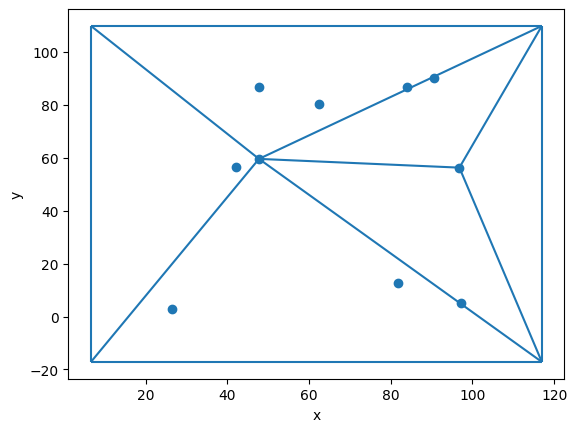

In [14]:
points = gen_points(10)
tri = DelaunayTriangulation(points)
try:
    a,b = main_test(10,points,tri)
except:
    print(make_subscritable_points(points))
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points))
    vis.show()

In [16]:
print(tri.neighbours.edges.get(Edge(Point(6.618946356735918, 109.85208098513877), Point(47.74519665671683, 59.58276632945072))))

[<delaunay.triangle.Triangle object at 0x000002452A883710>, <delaunay.triangle.Triangle object at 0x000002452A7EA8D0>]


In [10]:
t = tri.inittriangle
p = points[5]
print(orientation(t.a,t.b,p))
print(orientation(t.b,t.c,p))
print(orientation(t.c,t.a,p))
print(tri.neighbours.find_neighbour(Edge(t.a,t.b),t))

curr = find_next_triangle(tri.neighbours, tri.inittriangle, p)
print(orientation(curr.a,curr.b,p))
print(orientation(curr.b,curr.c,p))
print(orientation(curr.c,curr.a,p))
for triangle in tri.neighbours.edges.get(Edge(curr.c,curr.a)):
    print(triangle)

curr = find_next_triangle(tri.neighbours,curr,p)

1
2
1
Triangle(Point(32.82351270685061, 43.58302558667292), Point(84.95386543570635, 17.10299621111071), Point(92.06780835174322, 36.27062044704945))
2
2
1
Triangle(Point(32.82351270685061, 43.58302558667292), Point(84.95386543570635, 17.10299621111071), Point(92.06780835174322, 36.27062044704945))


Exception: AAAAAAa

In [9]:
p = Point(74.1099003225949, 88.28744804892274)
t = Triangle(Point(67.46256859646115, 62.644874366148386), Point(115.90925536113906, 115.6486044984571), Point(58.78400554290321, 95.82214804210244))
print(orientation(t.c,t.a,p))
print(t.point_in_triangle(p))

2
True


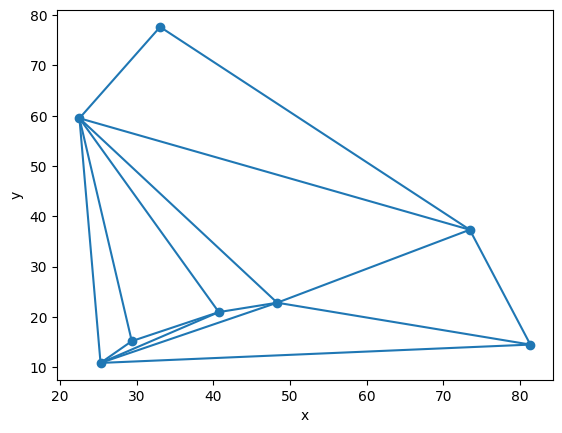

In [18]:
def make_subscritable_points(list):
    list2 = []
    for point in list:
        list2.append((point.x,point.y))
    return list2

points = [Point(1,7),Point(6,8),Point(4,2)]
tri, points = main_test(8)

vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points))
vis.show()


In [ ]:
print(Point(1,7).is_in_circumcircle_of(Triangle(Point(-8.030899869919436, -7.030899869919436), Point(15.030899869919436, -7.030899869919436), Point(15.030899869919436, 17.030899869919438))))

True


In [14]:
points = [Point(2,5),Point(7,2),Point(4,6)]

t = Triangle(points[0],points[1],points[2])
vis = Visualizer()
vis.add_polygon(make_subscritable_points(points),fill=False)
point = t.find_incenter()
vis.add_point((point))
vis.show()

AttributeError: 'Triangle' object has no attribute 'find_incenter'